<a href="https://colab.research.google.com/github/Kusuma-Bhargavi-Nadendla/Machine-Learning/blob/main/AdvancedML_Regularization_LinearFor_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ipl_auction_df=pd.read_csv('IPL IMB381IPL2013.csv')
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [ ]:
X_features =['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', "T-WKTS", 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', "HS", "AVE", 'SR-B', 'SIXERS', "RUNS-C", 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']


In [ ]:
#Initialize a List with the categorical feature names.
categorical_features= ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']
#get dummies() is imoked to return the dummy features.
ipl_auction_encoded_df =pd.get_dummies(ipl_auction_df [X_features], columns=categorical_features, drop_first= True )



In [ ]:
ipl_auction_encoded_df.columns


Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [ ]:
X =ipl_auction_encoded_df
Y =ipl_auction_df[ 'SOLD PRICE' ]

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
## Initializing the StandardScaler
X_scaler =StandardScaler()
## Standardize all the feature columns
X_scaled =X_scaler.fit_transform(X)
## Standardizing v explictly by subtracting mean and
## dividing by standard deviation
Y =(Y - Y.mean()) / Y.std()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled, Y, test_size= 0.2, random_state =42)


In [ ]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
linreg.coef_

array([-0.43539611, -0.04632556,  0.50840867, -0.03323988,  0.2220377 ,
       -0.05065703,  0.17282657, -0.49173336,  0.58571405, -0.11654753,
        0.24880095,  0.09546057,  0.16428731,  0.26400753, -0.08253341,
       -0.28643889, -0.26842214, -0.21910913, -0.02622351,  0.24817898,
        0.18760332,  0.10776084,  0.04737488,  0.05191335,  0.01235245,
        0.00547115, -0.03124706,  0.08530192,  0.01790803, -0.05077454,
        0.18745577])

In [ ]:
## corresponding coefficient values
columns_coef_df =pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef': linreg.coef_ })
#e sorting the features by coefficient values in descending order
sorted_coef_vals =columns_coef_df.sort_values('coef', ascending=False)

Text(0, 0.5, 'Features')

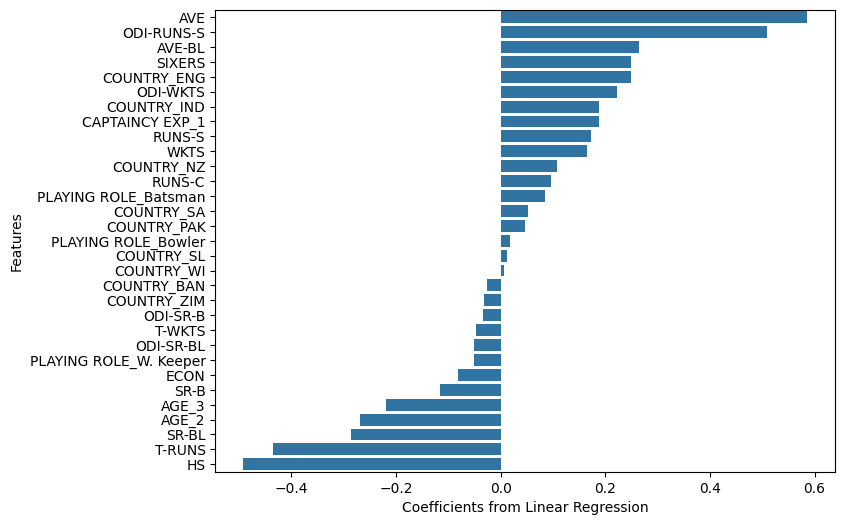

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure( figsize=(8, 6)) ## Creating a bar plot
sn.barplot(x="coef", y="columns", data=sorted_coef_vals);
plt.xlabel("Coefficients from Linear Regression")
plt.ylabel("Features")



In [ ]:
import numpy as np
from sklearn import metrics
#Tokes a model as a parameter
#Prints the RNSE on train and test set
def get_train_test_rmse(model):
    #Predicting on training datoset
    y_train_pred= model.predict(X_train)
    #Compare the actual y with predicted y in the training dataset
    rmse_train =round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),3)
    #Predicting on test dataset
    y_test_pred =model.predict(X_test)
    #Compare the actual y with predicted y in the test dataset
    rmse_test= round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), 3)
    print( "train:", rmse_train, "test:", rmse_test)
get_train_test_rmse(linreg)

train: 0.679 test: 0.749


Model overfitting can be seen.
Apply Regularization to remove it


In [ ]:
#First technique to remove overfit
#importing Ridge Regression
from sklearn.linear_model import Ridge
#Applying alpha 1 and running the algorithes for marimum of 500 Iterations
ridge= Ridge(alpha= 1, max_iter =500)
ridge.fit(X_train, y_train)

Ridge(alpha=1, max_iter=500)

In [ ]:
get_train_test_rmse(ridge)


train: 0.68 test: 0.724


In [ ]:
ridge= Ridge(alpha =2.0, max_iter= 1000)
ridge.fit(X_train, y_train)
get_train_test_rmse(ridge)

train: 0.682 test: 0.706


In [ ]:
#Second technique to remove overfit
#Importing LASSO Regression
from sklearn.linear_model import Lasso
#Applying alpha 1 and running the algorithes for maximum of 500
#iterotions
lasso =Lasso(alpha =0.01, max_iter= 500)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01, max_iter=500)

In [ ]:
get_train_test_rmse(lasso)


train: 0.688 test: 0.698


In [ ]:
##Storing the feature names and coefficient values in the Datafrane
lasso_coef_df= pd.DataFrame({'columns': ipl_auction_encoded_df.columns, 'coef': lasso.coef_})
#Filtering out coefficients with zeros
lasso_coef_df[lasso_coef_df.coef ==0]

,columns,coef
1,T-WKTS,-0.0
3,ODI-SR-B,-0.0
13,AVE-BL,-0.0
28,PLAYING ROLE_Bowler,0.0


In [ ]:
#ElasticNet combines both the techniques
from sklearn.linear_model import ElasticNet
enet= ElasticNet(alpha= 1.01, l1_ratio= 0.001, max_iter= 500)
enet.fit(X_train, y_train)
get_train_test_rmse(enet)
#Since the rmse of combination is less than second one. WE Avoid it. and apply the second technique finally.

train: 0.789 test: 0.665
